In [1]:
import sys
sys.path.append("..")
# import splitwavepy as s

import scipy
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors
import colorcet as cc

from splitwavepy import geom

When I measure shear wave splitting I normally use only the horizontal components.  The *fast direction* $\phi$ is measured in the geographical frame at the receiver and is, by convention, measured clockwise from north (I guess this makes plotting on a map easy).  Sometimes I want to know what $\phi$ is in the ray frame.  To estimate this I use the equation $\phi_{ray} \approx \beta - \phi_{rcv}$ where $\beta$ is *back azimuth* and the subscripts *ray* and *rcv* refer to the reference frame of $\phi$, i.e., ray and receiver respectively.

Here I investigate how accurate this transform is as a function of the incoming ray inclination angle and the separation of $\phi$ from the rays *azimuth*.

In [2]:

incs = np.arange(90)
azs = np.arange(360)
phi = 0

# note that az and inc are measured at the station.  
# this is not the standard definition of azimuth used in earthquake seismology.
# here: azimuth = backazimuth + 180.

INCS,AZS = np.meshgrid(incs,azs)
PHIS = phi * np.ones(INCS.shape)

def phiray(phigeo,az):
    baz = az + 180
    return ((baz - phigeo)+3690)%180-90

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


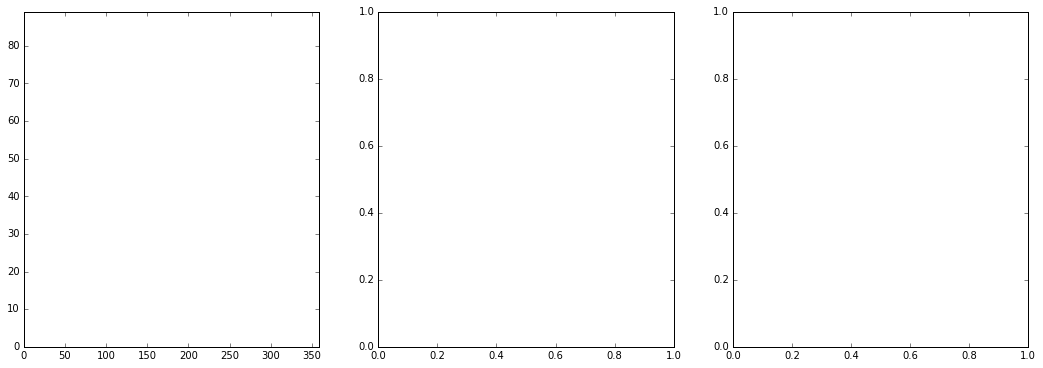

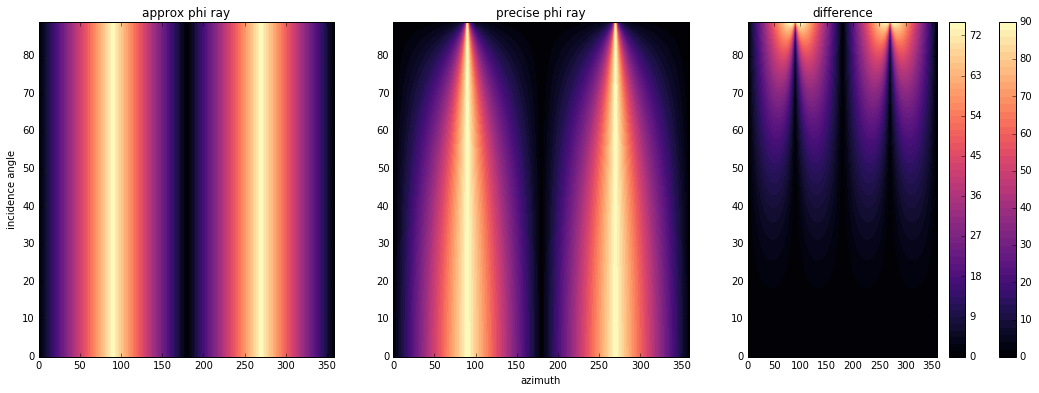

In [10]:
approxphiray = phiray(PHIS,AZS)

phiray_precise = np.vectorize(geom.phigeo2ray)
exactphiray = phiray_precise(PHIS,AZS,INCS)

# cyclic clormap
cyclicmap = colors.LinearSegmentedColormap.from_list('test',cc.cyclic_mygbm_30_95_c78_s25)

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
ax[0].contourf(AZS,INCS,abs(approxphiray),50,cmap='magma')
ax[0].set_ylabel('incidence angle')
ax[0].set_title('approx phi ray')
ax[1].set_xlabel('azimuth')
ax[1].set_title('precise phi ray')
bax = ax[1].contourf(AZS,INCS,abs(exactphiray),50,cmap='magma')
fig.colorbar(bax)
cax = ax[2].contourf(AZS,INCS,abs((exactphiray - approxphiray+1890)%180-90),50,cmap='magma')
# ax[2].contour(AZS,INCS,abs((exactphiray - approxphiray+1890)%180-90),levels=[1],colors='w')
ax[2].set_title('difference')
fig.colorbar(cax)
plt.show()



## Conclusion

Provided the incidence angle is less that about 30 degrees (which it should be) the difference in $\phi_{ray}$ between the approximate and the precise method is very small.